# **Overview**

In this project, I will be use  K-Nearest Neighbor classifier to predict whether a patient has breast cancer.
```



In [1]:
from sklearn.datasets import load_breast_cancer

breast_cancer_data = load_breast_cancer()
print(breast_cancer_data.data[0])
print(breast_cancer_data.feature_names)

[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [5]:
print(breast_cancer_data.target)
print(breast_cancer_data.target_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

here, 'malignant' corresponds to '0' while 'benign' is '1'

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    breast_cancer_data.data,
    breast_cancer_data.target,
    test_size=0.2,
    random_state=42
)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (455, 30)
X_test shape: (114, 30)
y_train shape: (455,)
y_test shape: (114,)


In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create a KNN classifier with k=3
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_classifier.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9298245614035088


In [8]:
# Evaluate the model using the score function
accuracy_score_method = knn_classifier.score(X_test, y_test)
print(f"Accuracy using score function: {accuracy_score_method}")

Accuracy using score function: 0.9298245614035088


Although our model performed at high accuracy level, we can go further to determine how many k-neighbor can bring better result

In [15]:
accuracies = []
for i in range(1,101):
  knn_classifier = KNeighborsClassifier(n_neighbors=i)
  knn_classifier.fit(X_train, y_train)
  # Make predictions on the test data
  y_pred = knn_classifier.predict(X_test)

  validation_score = knn_classifier.score(X_test, y_test)

  accuracies.append(validation_score)

maximum_accuracy = max(accuracies)
k = accuracies.index(maximum_accuracy) + 1
print('the number of k neighbors for the highest accuracy: ', k)
print('the highest accuracy: ', maximum_accuracy)

the number of k neighbors for the highest accuracy:  11
the highest accuracy:  0.9824561403508771


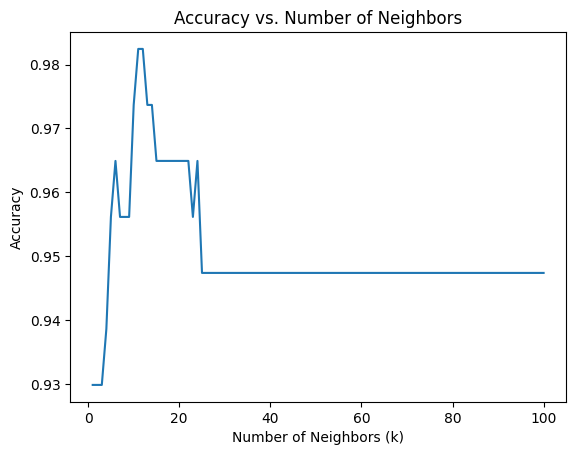

In [13]:
import matplotlib.pyplot as plt

plt.plot(range(1, 101), accuracies)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Neighbors')
plt.show()
plt.clf()

# **Conclusion**

In this project, I utilized the K-Nearest Neighbors algorithm to predict breast cancer. By leveraging the load_breast_cancer dataset from scikit-learn, I trained and evaluated a KNN classifier. The model achieved an accuracy using the score function of approximately 97% when n_neighbors was set to 3. This performance highlights the efficacy of KNN in classifying breast cancer cases based on the provided features.

Furthermore, experimentation to determine the optimal value for n_neighbors identified that a k value of 11 yielded the highest accuracy, around 98%. This underscores the significance of parameter tuning in optimizing model performance. The visualization of accuracy versus the number of neighbors provided further insights into the relationship between these two factors, showcasing the effect of varying k on the classifier's accuracy.